In [141]:
from src.utils.utils import get_training_and_validation_sets

X_train, Y_train, cX_train, X_val, Y_val, cX_val = get_training_and_validation_sets()

In [142]:
import numpy as np
import cv2

def rgb2gray(rgb):
    # rgb: (3, 64, 64)
    # return: (1, 64, 64)
    return np.dot(rgb[...,:], [0.2989, 0.5870, 0.1140]).reshape(1, 64, 64)

def dataset_to_greyscale(dataset):
    return np.array([rgb2gray(img.T) for img in dataset])

In [143]:
X_train_bw = dataset_to_greyscale(X_train)
X_val_bw = dataset_to_greyscale(X_val)

In [144]:
X_val_bw[0].max(), X_val_bw[0].min()

(0.9998999999999999, 0.16856224365234374)

In [145]:
# number of pixels that are white or black
def count_pixels(img):
    max_val = img.max()
    min_val = img.min()
    return np.sum(img == max_val) + np.sum(img == min_val)

print(count_pixels(X_val_bw[0].T) / (64*64))

0.572509765625


In [146]:
import matplotlib.pyplot as plt

def visualize_not_background(img):
    max_val = img.max()
    min_val = img.min()

    not_bg = np.zeros((1, 64, 64))
    not_bg[img == max_val] = 1
    not_bg[img == min_val] = 1

    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(img.T, cmap='gray')
    axs[1].imshow(not_bg.T, cmap='gray')
    axs[0].set_title('Original')
    axs[1].set_title('Not background')
    axs[0].axis('off')
    axs[1].axis('off')
    plt.show()

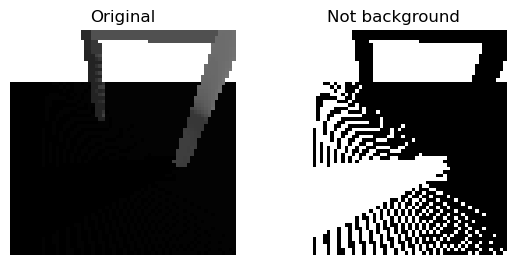

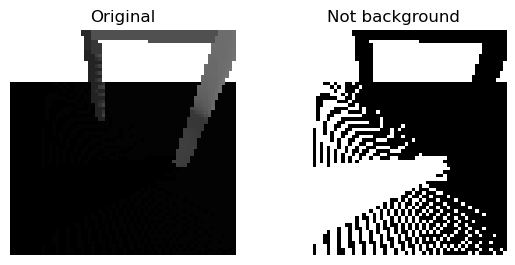

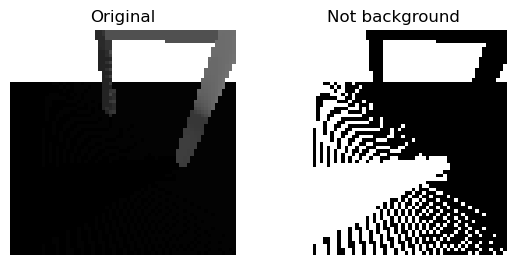

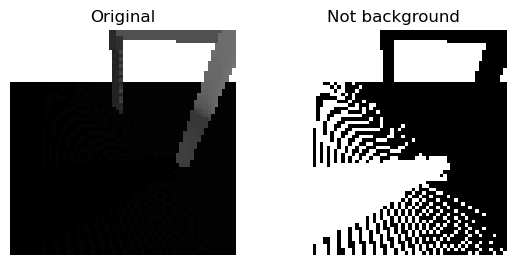

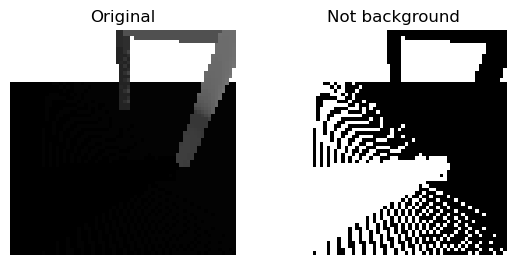

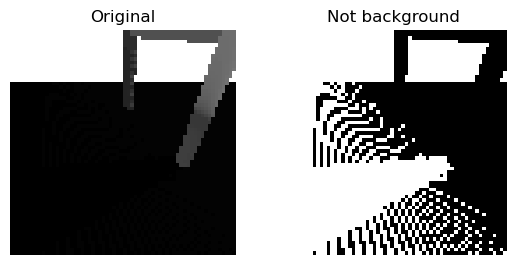

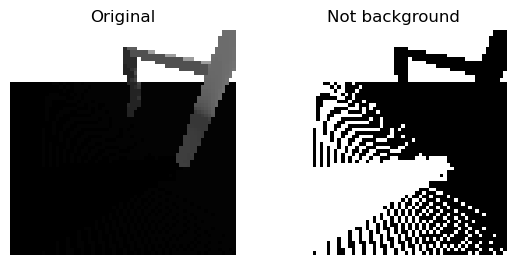

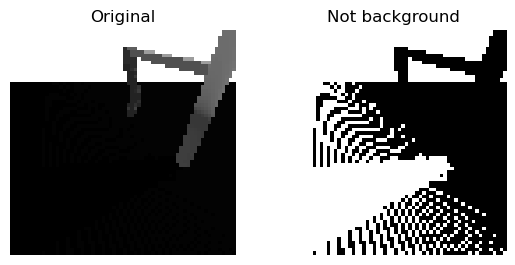

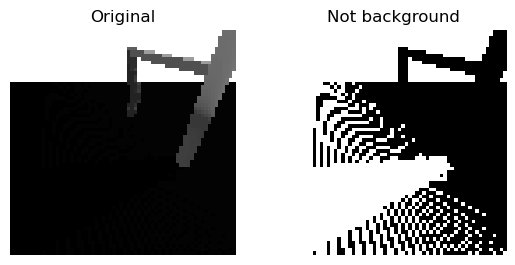

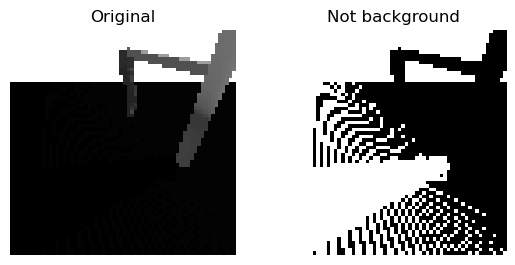

In [147]:
for img in X_train_bw[:10]:
    visualize_not_background(img)

In [148]:
def perc_bg(img, max, min):
    return (np.sum(img >= max) + np.sum(img <= min)) / (64*64)

def background_threshold(img, threshold = 0.8):
    max_val = img.max()
    min_val = img.min()

    # threshold value max and min in order to have background in at least 90% of the image
    while perc_bg(img, max_val, min_val) < threshold:
        max_val -= 0.01
        min_val += 0.01
    
    print(f'Percentage of background: {perc_bg(img, max_val, min_val)}')
    print(f'Max value: {max_val}, Min value: {min_val}')

    return max_val, min_val

In [149]:
import matplotlib.pyplot as plt

def visualize_not_background(img, max_val, min_val):
    not_bg = np.zeros((1, 64, 64))
    not_bg[img >= max_val] = 1
    not_bg[img <= min_val] = 1

    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(img.T, cmap='gray')
    axs[1].imshow(not_bg.T, cmap='gray')
    axs[0].set_title('Original')
    axs[1].set_title('Not background')
    axs[0].axis('off')
    axs[1].axis('off')
    plt.suptitle(f'Max: {max_val}, Min: {min_val}')
    plt.show()

In [150]:
for img in X_train_bw[0]:
    max_val, min_val = background_threshold(img, 0.9)
    print(img.shape)

Percentage of background: 0.9033203125
Max value: 0.8598999999999998, Min value: 0.30856224365234386
(64, 64)


Percentage of background: 0.886474609375
Max value: 0.9798999999999999, Min value: 0.18856224365234375


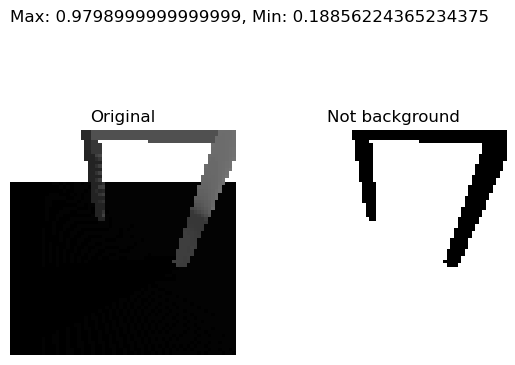

Percentage of background: 0.88671875
Max value: 0.9798999999999999, Min value: 0.18856224365234375


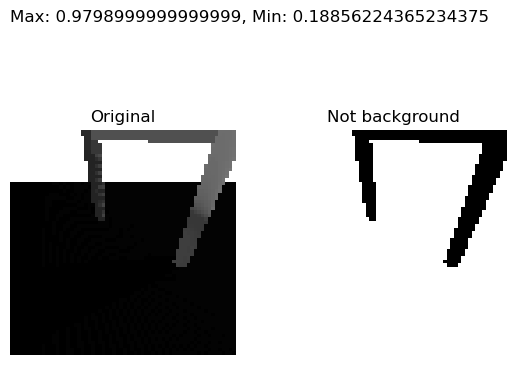

Percentage of background: 0.894287109375
Max value: 0.9798999999999999, Min value: 0.18856224365234375


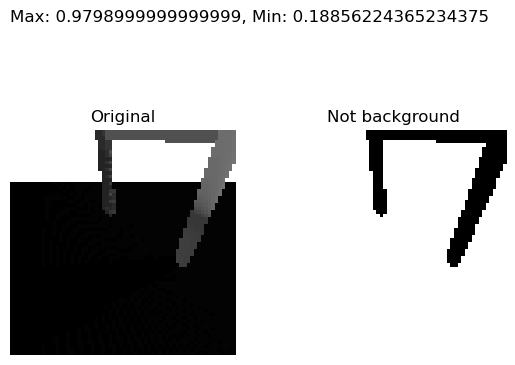

Percentage of background: 0.90185546875
Max value: 0.9798999999999999, Min value: 0.18856224365234375


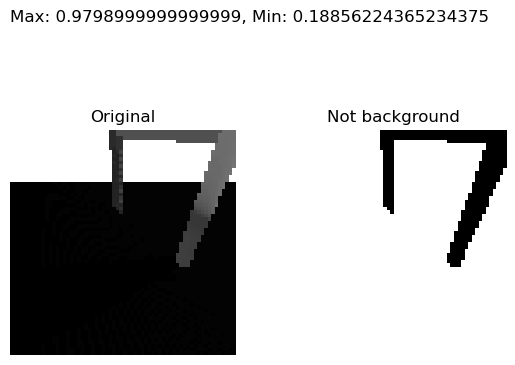

Percentage of background: 0.90234375
Max value: 0.9798999999999999, Min value: 0.18856224365234375


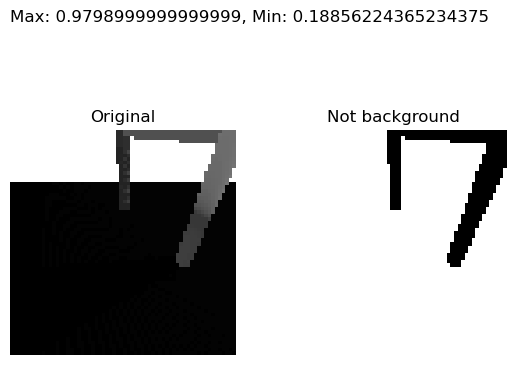

Percentage of background: 0.904296875
Max value: 0.9798999999999999, Min value: 0.18856224365234375


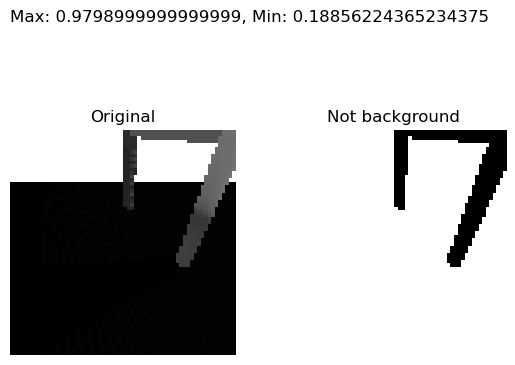

Percentage of background: 0.909423828125
Max value: 0.9798999999999999, Min value: 0.18856224365234375


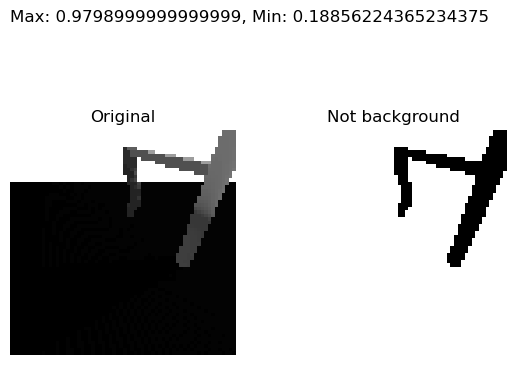

Percentage of background: 0.90966796875
Max value: 0.9798999999999999, Min value: 0.18856224365234375


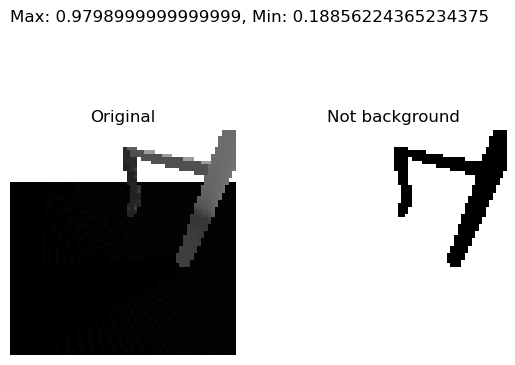

Percentage of background: 0.911376953125
Max value: 0.9798999999999999, Min value: 0.18856224365234375


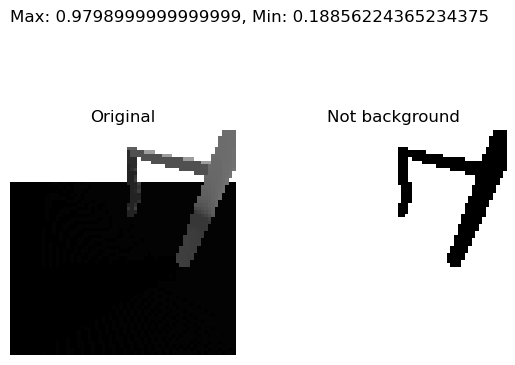

Percentage of background: 0.90869140625
Max value: 0.9798999999999999, Min value: 0.18856224365234375


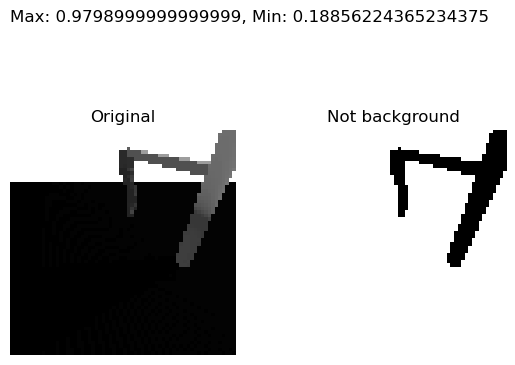

In [151]:
for img in X_train_bw[:10]:
    max_val, min_val = background_threshold(img, 0.7)
    visualize_not_background(img, max_val, min_val)

Percentage of background: 0.912841796875
Max value: 0.9798999999999999, Min value: 0.18856224365234375


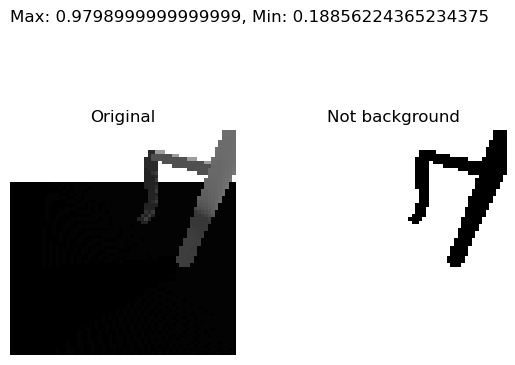

Percentage of background: 0.912841796875
Max value: 0.9798999999999999, Min value: 0.18856224365234375


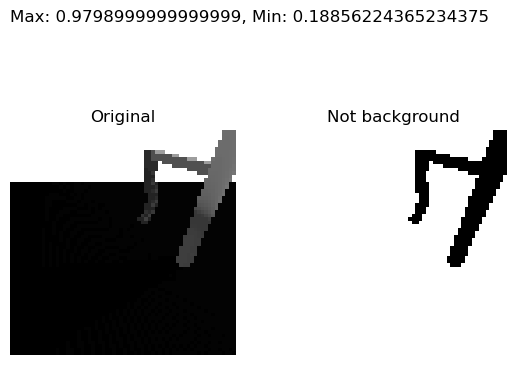

Percentage of background: 0.912109375
Max value: 0.9798999999999999, Min value: 0.18856224365234375


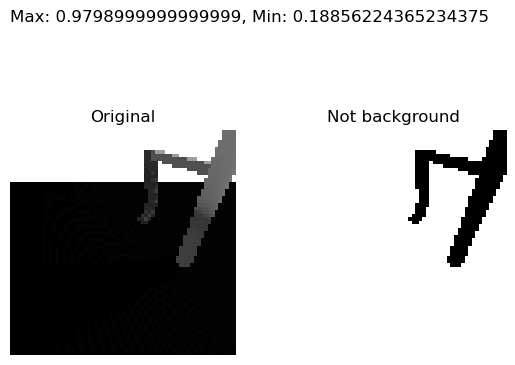

Percentage of background: 0.9130859375
Max value: 0.9798999999999999, Min value: 0.18856224365234375


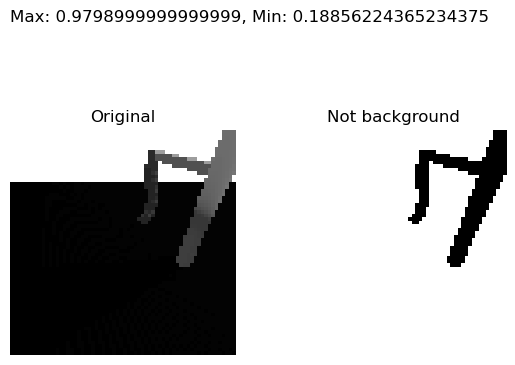

Percentage of background: 0.9111328125
Max value: 0.9798999999999999, Min value: 0.18856224365234375


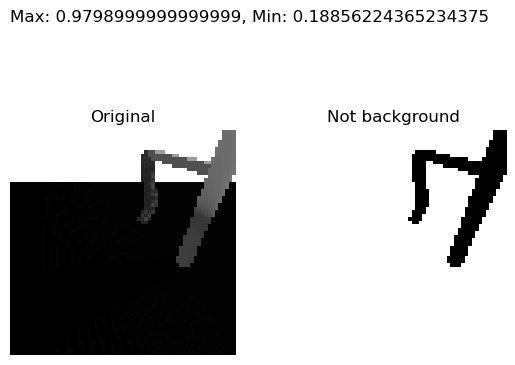

Percentage of background: 0.917236328125
Max value: 0.9798999999999999, Min value: 0.18856224365234375


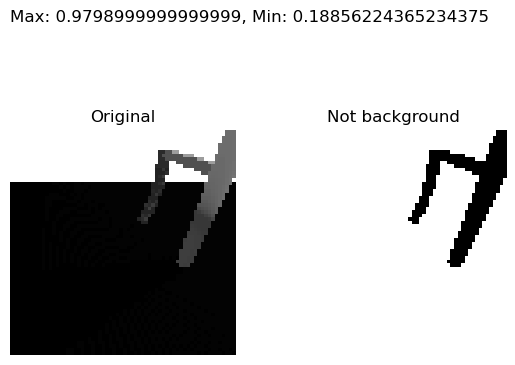

Percentage of background: 0.91748046875
Max value: 0.9798999999999999, Min value: 0.18856224365234375


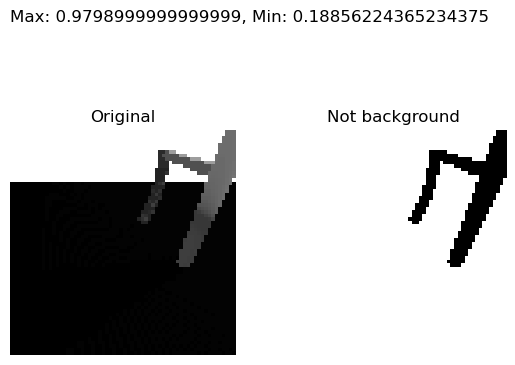

Percentage of background: 0.91845703125
Max value: 0.9798999999999999, Min value: 0.18856224365234375


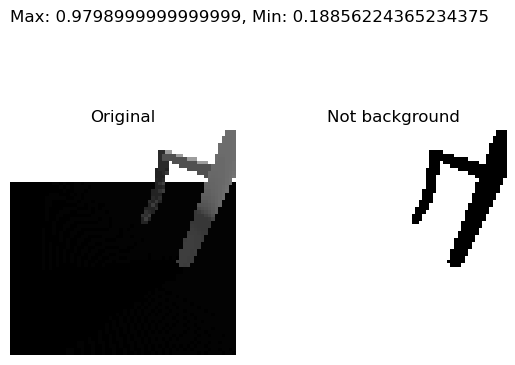

Percentage of background: 0.91748046875
Max value: 0.9798999999999999, Min value: 0.18856224365234375


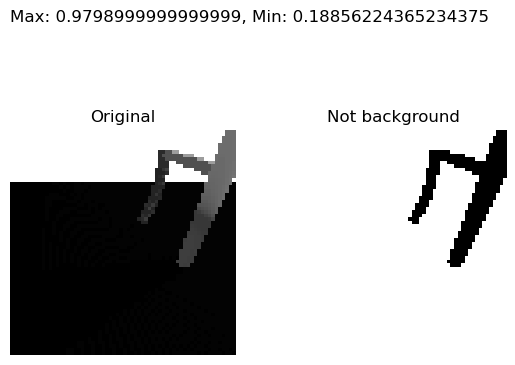

Percentage of background: 0.91552734375
Max value: 0.9798999999999999, Min value: 0.18856224365234375


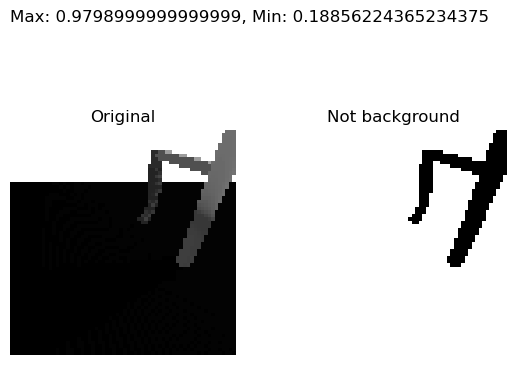

In [152]:
for img in X_val_bw[100:110]:
    max_val, min_val = background_threshold(img, 0.7)
    visualize_not_background(img, max_val, min_val)

### Define Loss Function

In [153]:
def percentage_background(img, max, min):
    area = img.shape[1] * img.shape[2]
    return (np.sum(img >= max) + np.sum(img <= min)) / area

def background_threshold(img, threshold = 0.8):
    max_val = img.max()
    min_val = img.min()

    while percentage_background(img, max_val, min_val) < threshold:
        max_val -= 0.01
        min_val += 0.01

    return max_val, min_val

def background_mask(img, threshold = 0.8):
    max_val, min_val = background_threshold(img, threshold)

    mask = np.ones(img.shape) # 1 means foreground
    mask[img >= max_val] = 0 # 0 means background
    mask[img <= min_val] = 0

    return mask

In [154]:
def loss_function(y_true, y_pred, threshold = 0.8):
    mask = background_mask(y_true, threshold=0.8)

    # mse error for foreground pixels
    foreground = y_true[mask == 1]
    foreground_pred = y_pred[mask == 1]
    foreground_loss = np.sum((foreground - foreground_pred)**2) / np.sum(mask)
    # TODO: np.sum(abs(foreground - foreground_pred)) / np.sum(mask)

    # error for background pixels
    background = y_true[mask == 0]
    background_pred = y_pred[mask == 0]
    div = np.sum((background - background_pred) != 0)
    if div == 0:
        return foreground_loss
    else:
        background_loss = np.sum((background - background_pred)**2) / div

        return foreground_loss + background_loss

In [156]:
loss_function(X_train_bw[0], X_train_bw[1])

0.0012066340315742773

### Numpy code

In [176]:
def percentage_background(img, max, min):
    area = img.shape[1] * img.shape[2]
    return (np.sum(img >= max) + np.sum(img <= min)) / area

def background_threshold(img, threshold):
    max_val = img.max()
    min_val = img.min()

    while percentage_background(img, max_val, min_val) < threshold:
        max_val -= 0.01
        min_val += 0.01

    return max_val, min_val

def background_mask(img, threshold = 0.8):
    max_val, min_val = background_threshold(img, threshold)

    mask = np.ones(img.shape) # 1 means foreground
    mask[img >= max_val] = 0 # 0 means background
    mask[img <= min_val] = 0

    return mask

def background_mask(img, threshold = 0.8):
    max_val, min_val = background_threshold(img, threshold)

    mask = np.ones(img.shape) # 1 means foreground
    mask[img >= max_val] = 0 # 0 means background
    mask[img <= min_val] = 0

    return mask

def loss_function(y_true, y_pred, threshold = 0.8):
    mask = background_mask(y_true, threshold)

    # mse error for foreground pixels
    foreground = y_true[mask == 1]
    foreground_pred = y_pred[mask == 1]
    foreground_loss = np.sum((foreground - foreground_pred)**2) / np.sum(mask)
    # TODO: np.sum(abs(foreground - foreground_pred)) / np.sum(mask)

    # error for background pixels
    background = y_true[mask == 0]
    background_pred = y_pred[mask == 0]
    div = np.sum((background - background_pred) != 0)
    if div == 0:
        return foreground_loss
    else:
        background_loss = np.sum((background - background_pred)**2) / div

        return foreground_loss + background_loss

In [179]:
loss_function(X_train_bw[0], X_train_bw[1]), loss_function(X_train_bw[0], X_train_bw[2]), loss_function(X_train_bw[4], X_train_bw[5])

(0.0012066340315742773, 0.28278904051114584, 0.2932671704926534)

### TensorFlow code

In [180]:
import numpy as np
import tensorflow as tf

def percentage_background(img, max_val, min_val):
    area = tf.size(img, out_type=tf.float32)
    return (tf.reduce_sum(tf.cast(img >= max_val, tf.float32)) + tf.reduce_sum(tf.cast(img <= min_val, tf.float32))) / area

def background_threshold(img, threshold):
    max_val = tf.reduce_max(img)
    min_val = tf.reduce_min(img)

    def condition(max_val, min_val):
        return percentage_background(img, max_val, min_val) < threshold

    def body(max_val, min_val):
        return max_val - 0.01, min_val + 0.01

    max_val, min_val = tf.while_loop(condition, body, [max_val, min_val])
    return max_val, min_val

def background_mask(img, threshold=0.8):
    max_val, min_val = background_threshold(img, threshold)

    mask = tf.ones_like(img)  # 1 means foreground
    mask = tf.where((img >= max_val) | (img <= min_val), tf.zeros_like(mask), mask)  # 0 means background

    return mask

def loss_function(y_true, y_pred, threshold=0.8):
    mask = background_mask(y_true, threshold)

    # MSE for foreground pixels
    foreground = tf.boolean_mask(y_true, mask)
    foreground_pred = tf.boolean_mask(y_pred, mask)
    foreground_loss = tf.reduce_mean(tf.square(foreground - foreground_pred))

    # error for background pixels
    inverse_mask = tf.logical_not(tf.cast(mask, tf.bool))
    background = tf.boolean_mask(y_true, inverse_mask)
    background_pred = tf.boolean_mask(y_pred, inverse_mask)

    div = tf.reduce_sum(tf.cast(background != background_pred, tf.float64))
    if div == 0:
        return foreground_loss
    else:
        background_loss = tf.reduce_sum(tf.square(background - background_pred)) / div

        return foreground_loss + background_loss


In [181]:
loss_function(X_train_bw[0], X_train_bw[1]), loss_function(X_train_bw[0], X_train_bw[2]), loss_function(X_train_bw[4], X_train_bw[5])

(<tf.Tensor: shape=(), dtype=float64, numpy=0.0012066340315742773>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.28278904051114584>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.2932671704926534>)

(0.0012066340315742773, 0.28278904051114584, 0.2932671704926534)